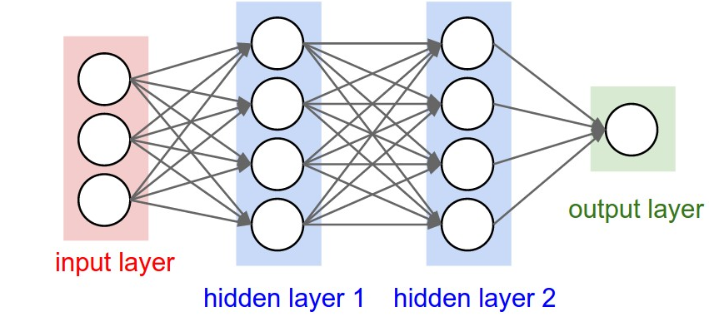

# ANN ( Artificial Neural Network)


## Importing Necessary libraries

In [1]:
#importing necessary libraries
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import random

from keras.datasets import mnist #importing mnist dataset from datasets class
from keras.models import Sequential #Sequential groups a linear stack of layers into a tf.keras.Model.



from keras.layers.core import Dense, Dropout, Activation
from keras.utils import np_utils #from the utils module importing numpy utils

**Random** - Python Random module is an in-built module of Python which is used to generate random. 

**Keras** : Keras is a deep learning API written in Python, running on top of the machine learning platform TensorFlow.

From the keras library we call upon the datasets class and from there we import mnist dataset.
From the keras models module we import sequential class. 
The Sequential model, which is very straightforward (a simple list of layers), but is limited to single-input, single-output stacks of layers.

**Layers**: Layers are the basic building blocks of neural networks in Keras.

From layers api we import te dense, activation and dropout classes from the core layers module.


# Loading Training Data

The mnist data is split between 60000 images(28 x 28 px) training images and 10000 testing images (28 x 28)


Splitting into training and test set 

In [2]:
(X_train,y_train),(X_test,y_test)=mnist.load_data() #splitting into train and test data

#printing the shapes
print("X_train_shape", X_train.shape)
print("X_test_shape", X_test.shape)
print("y_train_shape", y_train.shape)
print("y_test_shape", y_test.shape)



11490434/11490434 [==============================] - 0s 0us/step
X_train_shape (60000, 28, 28)
X_test_shape (10000, 28, 28)
y_train_shape (60000,)
y_test_shape (10000,)


## Plotting the data

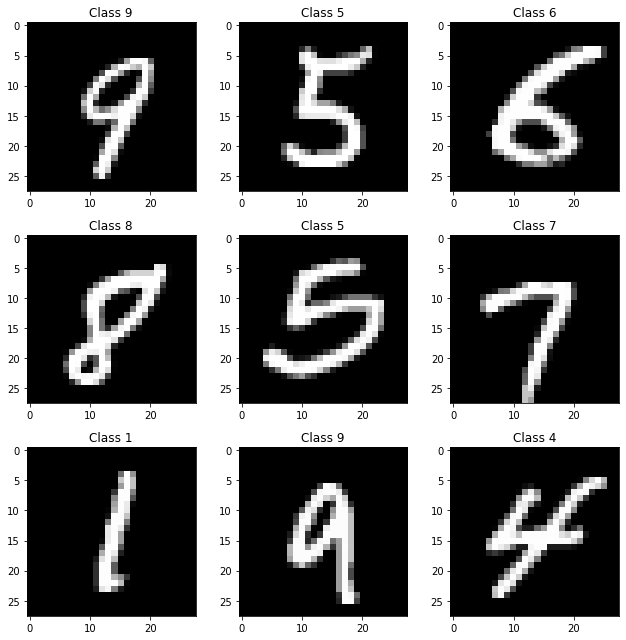

In [3]:
plt.rcParams['figure.figsize']=(9,9) #mentioning the fig size

for i in range(9):
  plt.subplot(3,3,i+1) #The subplot numbering starts from 1 but the range(9) starts from 0, so i+1 is used here to add 9 subplots, starting from 1, 2, 3, ..., 8, 9
  num=random.randint(0,len(X_train)) #Generates a random number between a given positive range which is 0 to length of the X_train set
  plt.imshow(X_train[num],cmap='gray',interpolation='none') 
#plt.imshow just finishes drawing a picture instead of printing it. If you want to print the picture, you just need to add plt.show.
  plt.title("Class {}".format(y_train[num])) #assigning a title to the plots

plt.tight_layout() #the tight_layout takes arguments.These control the extra padding around the figure border and between subplots. 

### Reshaping the data and converting the type

In [4]:
X_train=X_train.reshape(60000,784) # Gives a new shape to an array without changing its data.
X_test=X_test.reshape(10000,784)

X_train=X_train.astype('float32') #Converting the data type into float 
X_test=X_test.astype('float32')





In [5]:
X_train /=255 # since each pixel takes a valiue between 0 and 255 so dividing by 255 we are features scaling
X_test /= 255

In [6]:
print("training matrix shape:" ,X_train.shape) #printing the shape of the train and test data after scaling
print("testing matrix shape:", X_test.shape)

training matrix shape: (60000, 784)
testing matrix shape: (10000, 784)


## Encoding the categorical data 

 to_categorical class: Converts a class vector (integers) to binary class matrix.

In [7]:
nb_classes=10 #10 classes in our dataset

Y_train=np_utils.to_categorical(y_train,nb_classes)
Y_test=np_utils.to_categorical(y_test,nb_classes)


## Building the ANN

Buiding an instance model which is a sequence of layers

In [8]:
model= Sequential()

# First hidden layer

## Adding the input layer and first hidden layer

In [9]:
model.add(Dense(512,input_shape=(784,))) 

 **Dense** is used to add a fully connected to our model.
 we call the dense class which takes parameters units.
units is the no of hidden layers you want to have, with high no of neurons we get better accuracy. Here we take 512 neurons.


input_shape: the input_shape specifies the shape.- The comma is necessary when you have only one dimension

Adding the activation

Activations can either be used through an Activation layer, or through the activation argument supported by all forward layers. relu:Applies the rectified linear unit activation function.

With default values, this returns the standard ReLU activation: max(x, 0), the element-wise maximum of 0 and the input tensor.

In [10]:
model.add(Activation('relu'))  #.add method is used to add an activation layer to our model

In [11]:
model.add(Dropout(0.2)) 

The Dropout layer randomly sets input units to 0 with a frequency of rate at each step during training time, which helps prevent overfitting. Inputs not set to 0 are scaled up by 1/(1 - rate) such that the sum over all inputs is unchanged.

## Adding the second layer

In [12]:
model.add(Dense(512)) #dense adds a layer and it consists of 512 neurons
model.add(Activation('relu')) #adding the rectifier activation functoon
model.add(Dropout(0.2)) #adding the dropout with the rate=0.2

# The Final Output Layer

In [13]:
model.add(Dense(10)) ##no of neurons =10 as the output has 10 classses


In [14]:
model.add(Activation('softmax')) 

softmax activation function: Softmax converts a vector of values to a probability distribution.The elements of the output vector are in range (0, 1) and sum to 1. Softmax is often used as the activation for the last layer of a classification network because the result could be interpreted as a probability distribution.

## Summary

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 activation (Activation)     (None, 512)               0         
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 512)               262656    
                                                                 
 activation_1 (Activation)   (None, 512)               0         
                                                                 
 dropout_1 (Dropout)         (None, 512)               0         
                                                                 
 dense_2 (Dense)             (None, 10)                5

We get the total trainable parameters as 669,706 non trainable parameters as 1408

In neural networks in general, and in deep learning algorithms (CNN, DNN, etc.) that are also based on neural networks, trainable parameters are parameters that will be learned by the model during the training procedure such as weights and biases.

## Training the model

## Compiling the model

In [16]:
model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])

**compile** : configures the model for training.

**Adam**: Optimizer that implements the Adam algorithm.Adam optimization is a stochastic gradient descent method that is based on adaptive estimation of first-order and second-order moments.Adam,the optimizer updates the weight.

**loss**: The purpose of loss functions is to compute the quantity that a model should seek to minimize during training.

**Note**:For binary prediction the loss function is binary_crossentropy and here since we have more than 2 classes i.e. 10 classes our loss function is categorical crossentropy.

**Categorical crossentropy**: Computes the crossentropy loss between the labels and predictions.We use this crossentropy loss function when there are two or more label classes. We expect labels to be provided in a one_hot representation.

**Accuracy** : the metrics for evaluation. The accuracy class calculates how often predictions equal labels.

## Fitting the model

.fit method on ann object to train our model

batch training is more efficient in artificial training since training in 
batches is efficient
defualt value of batch training =128
epoch= 10
i.e. we will train the data in batches and will repeatedly iterate over the entire dataset 5 times.

verbose=1. Verbosity mode 1 shows progress bar



In [17]:
model.fit(X_train,Y_train,batch_size=128,epochs=10,verbose=1)

Epoch 1/10
469/469 [==============================] - 12s 25ms/step - loss: 0.2499 - accuracy: 0.9256
Epoch 2/10
469/469 [==============================] - 12s 25ms/step - loss: 0.1007 - accuracy: 0.9685
Epoch 3/10
469/469 [==============================] - 7s 15ms/step - loss: 0.0701 - accuracy: 0.9779
Epoch 4/10
469/469 [==============================] - 7s 15ms/step - loss: 0.0567 - accuracy: 0.9816
Epoch 5/10
469/469 [==============================] - 7s 15ms/step - loss: 0.0475 - accuracy: 0.9842
Epoch 6/10
469/469 [==============================] - 7s 15ms/step - loss: 0.0386 - accuracy: 0.9873
Epoch 7/10
469/469 [==============================] - 7s 15ms/step - loss: 0.0352 - accuracy: 0.9886
Epoch 8/10
469/469 [==============================] - 7s 15ms/step - loss: 0.0291 - accuracy: 0.9904
Epoch 9/10
469/469 [==============================] - 7s 15ms/step - loss: 0.0265 - accuracy: 0.9908
Epoch 10/10
469/469 [==============================] - 7s 15ms/step - loss: 0.0253 - accu

## Evaluating the model

Returns the loss value & metrics values for the model in test mode. Test score and test accuracy are returned



In [20]:
score=model.evaluate(X_test,Y_test)
print('Test score:', score[0])
print('Test accuracy:', score[1])

313/313 [==============================] - 1s 3ms/step - loss: 0.0715 - accuracy: 0.9824
Test score: 0.07153897732496262
Test accuracy: 0.9824000000953674


The test loss is 0.0325 and the accuracy of our model is 98.24 %. The test score is 7.15%

## Predictions



In [21]:
predicted_x=model.predict(X_test) #.predict is used to pedict on test data
predicted_classes=np.argmax(predicted_x,axis=1) ##predicting the output array
correct_indices=np.nonzero(predicted_classes==y_test)[0] # numpy.nonzero () function is used to Compute the indices of the elements that are non-zero. 
#We  find the no of correct predictions and their indices
incorrect_indices=np.nonzero(predicted_classes != y_test)[0] #no of incorrect predictions and finding their indices

313/313 [==============================] - 1s 3ms/step


Visualizing the correct and incorrect predictions

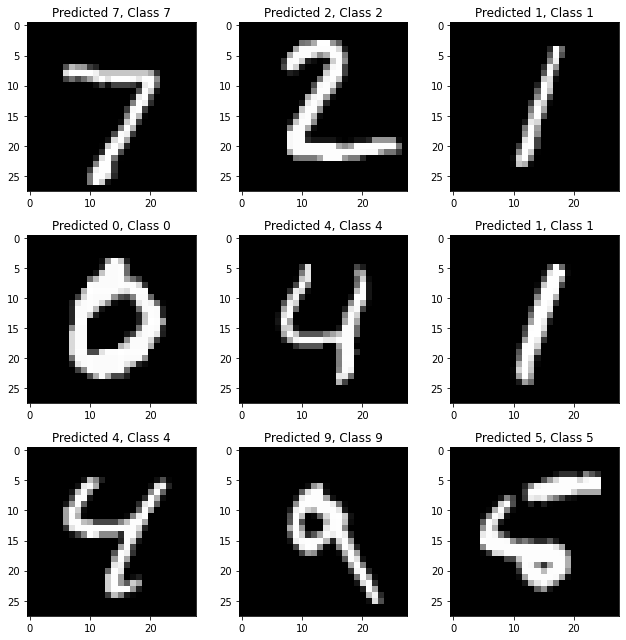

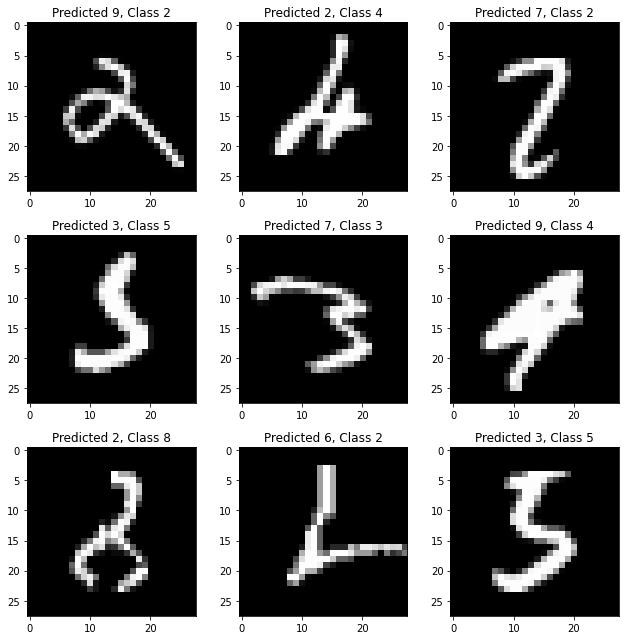

In [22]:
plt.figure()
for i, correct in enumerate(correct_indices[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[correct].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[correct], y_test[correct]))
    
plt.tight_layout()
    
plt.figure()
for i, incorrect in enumerate(incorrect_indices[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[incorrect].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[incorrect], y_test[incorrect]))
    
plt.tight_layout()

Here we get to see the predicted class and real class and compare and evaluate